In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.optimizers import Adam,SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout,Dense
from keras.regularizers import l2






try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv


--2023-02-03 04:39:45--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0.007s  

2023-02-03 04:39:46 (6.89 MB/s) - ‘insurance.csv’ saved [50264/50264]



#Prepare datasets


In [3]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
print(pd.value_counts(data["sex"]))
print(pd.value_counts(data["smoker"]))
print(pd.value_counts(data["region"]))

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [5]:
#convert_strings_to_numbers
def label_encoder(col):
  le=LabelEncoder()
  labels=le.fit_transform(data[col])
  data[col]=labels

label_encoder("sex")
label_encoder("smoker")
label_encoder("region")

data.head()



,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [6]:
print(pd.value_counts(data["sex"]))
print(pd.value_counts(data["smoker"]))
print(pd.value_counts(data["region"]))


1    676
0    662
Name: sex, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
2    364
3    325
1    325
0    324
Name: region, dtype: int64


In [17]:
print(data)
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,train_size=0.8)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


      age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       3  16884.92
1      18    1  33.8         1       0       2   1725.55
2      28    1  33.0         3       0       2   4449.46
3      33    1  22.7         0       0       1  21984.47
4      32    1  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       1  10600.55
1334   18    0  31.9         0       0       0   2205.98
1335   18    0  36.9         0       0       2   1629.83
1336   21    0  25.8         0       0       3   2007.95
1337   61    0  29.1         0       1       1  29141.36

[1338 rows x 7 columns]
(1070, 6)
(268, 6)
(1070,)
(268,)


In [29]:
model=Sequential()
lambd = 0.01
model = Sequential([
        Dense(64, kernel_regularizer=l2(lambd), activation="relu", input_shape=(6,)),
        Dense(128, kernel_regularizer=l2(lambd), activation="relu"),
        Dense(128, kernel_regularizer=l2(lambd), activation="relu"),
        Dense(128, kernel_regularizer=l2(lambd), activation="relu"),
        Dense(64, kernel_regularizer=l2(lambd), activation="relu"),
        Dense(64, kernel_regularizer=l2(lambd), activation="relu"),
        Dense(64, kernel_regularizer=l2(lambd), activation="relu"),
        Dense(1, activation='linear'),
        #Dropout(0.2)
    ])
model.compile(optimizer=Adam(0.01),loss='mae',metrics=['mae','mse'])
model.build()
model.summary()



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                448       
                                                                 
 dense_25 (Dense)            (None, 128)               8320      
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dense_27 (Dense)            (None, 128)               16512     
                                                                 
 dense_28 (Dense)            (None, 64)                8256      
                                                                 
 dense_29 (Dense)            (None, 64)                4160      
                                                                 
 dense_30 (Dense)            (None, 64)               

In [30]:
history=model.fit(x_train,y_train,epochs=1000,validation_split=0.5)



Epoch 1/1000
17/17 [==============================] - 1s 19ms/step - loss: 10026.8506 - mae: 10023.5420 - mse: 217872112.0000 - val_loss: 7699.8647 - val_mae: 7697.5474 - val_mse: 145779520.0000
Epoch 2/1000
17/17 [==============================] - 0s 6ms/step - loss: 7344.8643 - mae: 7342.6016 - mse: 160836144.0000 - val_loss: 7048.1914 - val_mae: 7045.9536 - val_mse: 175631072.0000
Epoch 3/1000
17/17 [==============================] - 0s 7ms/step - loss: 7075.4819 - mae: 7073.2192 - mse: 166055200.0000 - val_loss: 7256.5161 - val_mae: 7254.2505 - val_mse: 151778304.0000
Epoch 4/1000
17/17 [==============================] - 0s 6ms/step - loss: 6819.2007 - mae: 6816.9795 - mse: 161782416.0000 - val_loss: 6710.6011 - val_mae: 6708.3975 - val_mse: 170080352.0000
Epoch 5/1000
17/17 [==============================] - 0s 8ms/step - loss: 6812.6621 - mae: 6810.4185 - mse: 159772080.0000 - val_loss: 6739.2471 - val_mae: 6736.9492 - val_mse: 151628400.0000
Epoch 6/1000
17/17 [=================

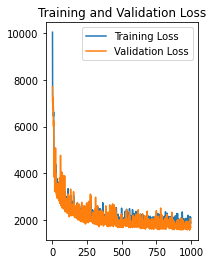

In [31]:

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(1000)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

9/9 - 0s - loss: 1432.2113 - mae: 1417.8597 - mse: 15260025.0000 - 31ms/epoch - 3ms/step
Testing set Mean Abs Error: 1417.86 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step
0.8924838063157327


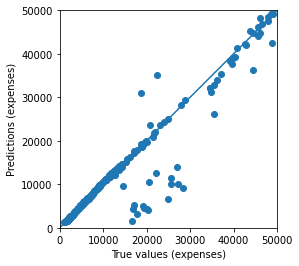

In [32]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(x_test, y_test, verbose=2)
from sklearn.metrics import r2_score
print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(x_test).flatten()

a = plt.axes(aspect='equal')
print(r2_score(y_test,test_predictions))
plt.scatter(y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
